In [1]:
from annotator import Annotator
from graph_density import Label_Metrics
import graphs as gr
import networkx as nx
import numpy as np
import pandas as pd

tyler = Annotator('tyler', "annotations-TBikaun.json")
daniel = Annotator('daniel', "annotations-danielsantosa.json")
caitlin = Annotator('caitlin', "annotations-caitlinwoods.json")
ziyu = Annotator('ziyu', "annotations-ziyu.zhao.json")
michael = Annotator('michael', "annotations-mstewartuwa.json")
tim = Annotator('tim', "annotations-Tim.json")
# melinda = Annotator('melinda', "annotations-mhodki.json")
label = Label_Metrics(ziyu, tyler, caitlin, tim)

In [19]:
overall_table = label.get_accumulated_table()
print(overall_table)

annotator_id                              caitlin                         tim  \
token                                                                           
head                                         None                        None   
head proximity switch                        Item                        None   
proximity switch                             None                        None   
repair                                   Activity                    Activity   
replace                                  Activity                    Activity   
240v                                    Specifier                   Specifier   
circuit                                      Item                        Item   
damaged                Observation/Observed_state  Observation/Observed_state   
inverter                                     Item                        Item   
has no output.         Observation/Observed_state  Observation/Observed_state   
inverter                    

In [31]:
percentage_same = 0.3
result_df = label.create_df_same_different(percentage_same, overall_table)
print(result_df)

Creating a DataFrame with 9 rows with same labels and 22 rows with different labels
annotator_id                              caitlin                         tim  \
token                                                                           
head                                    Specifier                   Specifier   
head proximity switch                        Item                        Item   
proximity switch                             Item                        Item   
repair                                   Activity                    Activity   
replace                                  Activity                    Activity   
240v                                    Specifier                   Specifier   
circuit                                      Item                        Item   
damaged                Observation/Observed_state  Observation/Observed_state   
inverter                                     Item                        Item   
has no output.         Ob

In [32]:
pd.set_option('display.max_rows', None)
pivoted_table = label.pivot_to_long_format_graph_edit(result_df)
print(pivoted_table)

    annotator_id                  token                       label
0        caitlin                   head                   Specifier
1        caitlin  head proximity switch                        Item
2        caitlin       proximity switch                        Item
3        caitlin                 repair                    Activity
4        caitlin                replace                    Activity
5        caitlin                   240v                   Specifier
6        caitlin                circuit                        Item
7        caitlin                damaged  Observation/Observed_state
8        caitlin               inverter                        Item
9        caitlin         has no output.  Observation/Observed_state
10       caitlin               inverter                        Item
13       caitlin               inverter                        Item
14       caitlin         keeps tripping  Observation/Observed_state
16       caitlin               inverter         

In [33]:
agreement_graph = Label_Metrics.create_agreement_graph(pivoted_table)

# Calculate the graph density
graph_density = Label_Metrics.custom_graph_density(agreement_graph)

Edge count: 39


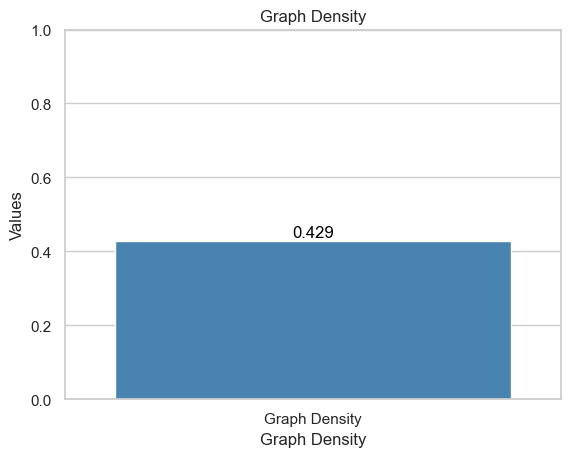

In [34]:
gr.create_bar_chart(graph_density, "Graph Density", "Values","Graph Density")